# Ejercicio 1.3 y 1.4
Virgil Ortiz Lascurain

**Fecha de finalización:**  de marzo de 2023

Tiempo: 2 días

### Ejercicio 1.3
###### Calcular los coeficiente de la aproximación $D_{3}f(x) = Af_{i+1} + B_{fi} + C_{fi−1} + D_{fi−2}$ y demostrar que el orden de esta aproximación es $O(h^3)$

Empezamos expandiendo la función $f$ en series de Taylor alrededor del punto $x_i$:

$$f_{i+1} = f_i + hf'_i + \frac{h^2}{2}f''_i + \frac{h^3}{6}f'''_i + O(h^4)$$

$$f_{i-1} = f_i - hf'_i + \frac{h^2}{2}f''_i - \frac{h^3}{6}f'''_i + O(h^4)$$

$$f_{i-2} = f_i - 2hf'_i + 2h^2f''_i - \frac{4}{3}h^3f'''_i + O(h^4)$$

Reemplazando estas expansiones en la definición de $D_3f(x)$, obtenemos:

$$D_3f(x) = Af_{i+1}+ Bf_i + Cf_{i-1} + Df_{i-2}$$

$$= A ( f_i + hf'_i + \frac{h^2}{2}f''_i + \frac{h^3}{6}f'''_i + O(h^4))$$

$$+ Bf_i$$

$$+ C ( f_i - hf'_i + \frac{h^2}{2}f''_i - \frac{h^3}{6}f'''_i + O(h^4))$$

$$+ D ( f_i - 2hf'_i + 2h^2f''_i - \frac{4}{3}h^3f'''_i + O(h^4))$$

Simplificando y agrupando términos, obtenemos:

$$D_3f(x) = ( A + B + C + D) f_i$$

$$+ ( A - C - 2D)f'_ih$$

$$+ ( \frac{A}{2} + \frac{C}{2} + 2D)f''_ih^2$$

$$+ ( \frac{A}{6} - \frac{C}{6} - \frac{4D}{3})f'''_ih^3 + O(h^4) $$

El sistema de ecuaciones nos quedaría de la siguiente manera:

$$
\left(
\begin{matrix}
1 & 1 & 1 & 1 \\
1 & 0 & -1 & -2 \\
\frac{1}{2} & 0 & \frac{1}{2} & 2 \\
\frac{1}{6} & 0 & -\frac{1}{6} & -\frac{4}{3} \\
\end{matrix}
\right)
\left(
\begin{matrix}
A \\
B \\
C \\
D \\
\end{matrix}
\right)
=
\left(
\begin{matrix}
0 \\
\frac{1}{h} \\
0 \\
0 \\
\end{matrix}
\right)
$$

Resolviendo este sistema de ecuaciones obtenemos que: 
$$A = \frac{1}{3h}$$ 
$$B = \frac{1}{2h}$$
$$C = -\frac{1}{h}$$ 
$$D = \frac{1}{6h}$$

Sustituyendo en $D_3f(x) = Af_{i+1}+ Bf_i + Cf_{i-1} + Df_{i-2}$:

$$D_3f(x) = \frac{1}{3h}f_{i+1}+ \frac{1}{2h}f_i + -\frac{1}{h}f_{i-1} + \frac{1}{6h}f_{i-2} = \frac{2f_{i+1} + 3f_i - 6f_{i-1} + f_{i-2}}{6h} = \dfrac{1}{6 h} \left( 2f_{i+1} + 3f_{i} - 6f_{i-1} + f_{i-2} \right)$$

Observe que hemos llamado al resultado $D_3f(x)$ que indica que se usan dos puntos a la izquierda y uno a la derecha de x. El orden de esta aproximación es $O(h^3)$.

### Ejercicio 1.4
###### Reproducir la tabla y la gráfica del ejemplo 3
###### Sea $u(x) = sin(x)$, (1) Aproximar $u'(x) = cos(x)$ en $x_o = 1$, es decir $cos(1) ≈ 0.5403$, usando $D_−, D_+, D_0, D_{−2}, D_{+2}$ y $D_3 = \frac{1}{6h}[2ui+1 + 3ui − 6ui−1 + ui−2]$ y calcular el error absoluto: $|cos(1) − D_i|$ para $i = −, +, 0, −2, +2, 3.$

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import macti.visual as mvis

Para obtener la tabla de errores de cada estimación y generar la gráfica con estas debemos saber que:

Diferencias finitas hacia adelante:
$
D_+ = \frac{f_{i+1} - f_i}{h}
$

Diferencias finitas hacia atrás:
$
D_- = \frac{f_i - f_{i - 1}}{h}
$

Diferencias finitas centradas:
$
D_0 = \frac{f_{i+1} - f_{i - 1}}{2h}
$

Diferencias finitas hacia adelante (3 puntos):
$$
D_{-2} = \frac{3 f_i - 4 f_{i-1} + f_{i-2}}{2h}
$$

Diferencias finitas hacia atrás (3 puntos):
$$
D_{+2} = \frac{-3 f_i + 4 f_{i+1} - f_{i+2}}{2h}
$$

Diferencias finitas un punto hacia adelante y dos puntos hacia atrás:
$$D_3f(x) = D_{3} = \dfrac{1}{6 h} \left( 2f_{i+1} + 3f_{i} - 6f_{i-1} + f_{i-2} \right)$$

Cálculo del error absoluto:
$$ |cos(1) - D_i| $$

In [7]:
#Implementemos, en primer lugar, las funciones para el cálculo de cada aproximación:
#Diferencias finitas hacia adelante:
def forward(u,x,h):
    return (u(x+h)-u(x))/h

#Diferencias finitas hacia atrás:
def backward(u,x,h):
    return (u(x)-u(x-h))/h

#Diferencias finitas centradas:
def centre(u,x,h):
    return (u(x+h)-u(x-h))/(2*h)

#Diferencias finitas hacia adelante (3 puntos):
def D_forward2(u,x,h):
    return (-3*u(x) +4*u(x+h) - u(x+2*h)) / (2*h)

#Diferencias finitas hacia atrás (3 puntos):
def D_backward2(u,x,h):
    return (3*u(x) -4*u(x-h) + u(x-2*h)) / (2*h)

#Diferencias finitas un punto hacia adelante y dos puntos hacia atrás:
def D3(u,x,h):
    return (2*u(x+h) + 3*u(x) -6*u(x-h) +u(x-2*h)) / (6*h)

In [8]:
#Evaluaremos y obtendremos el error absoluto sabiendo que:
u = np.sin
h = np.array([0.100, 0.050, 0.010, 0.005, 0.001])
x = np.ones(len(h))

#Obtención del error para cada aproximación:
#Diferencias finitas hacia adelante:
ef = np.fabs(np.cos(x) - forward(u,x,h))

#Diferencias finitas hacia atrás:
eb = np.fabs(np.cos(x) - backward(u,x,h))

#Diferencias finitas centradas:
ec = np.fabs(np.cos(x) - centre(u,x,h))

#Diferencias finitas hacia adelante (3 puntos):
ef2 = np.fabs(np.cos(x) - D_forward2(u,x,h))

#Diferencias finitas hacia adelante (3 puntos):
eb2 = np.fabs(np.cos(x) - D_backward2(u,x,h))

#Diferencias finitas un punto hacia adelante y dos puntos hacia atrás:
e3 = np.fabs( np.cos(x) - D3(u,x,h))

In [9]:
#Creamos la tabla y la gráfica solicitadas:

#Tabla
Error = pd.DataFrame(np.array([h,ef,eb,ec,ef2,eb2,e3]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_{+2}$', '$D_{-2}$', '$D_3$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_{+2}$,$D_{-2}$,$D_3$
0,0.100,0.042939,0.041138,9.000537e-04,1.584693e-03,2.004728e-03,6.820693e-05
1,0.050,0.021257,0.020807,2.250978e-04,4.235730e-04,4.761431e-04,8.649142e-06
2,0.010,0.004216,0.004198,9.004993e-06,1.779908e-05,1.821981e-05,6.994130e-08
3,0.005,0.002106,0.002101,2.251257e-06,4.476184e-06,4.528776e-06,8.754000e-09
4,0.001,0.000421,0.000421,9.005045e-08,1.798903e-07,1.803108e-07,6.997947e-11


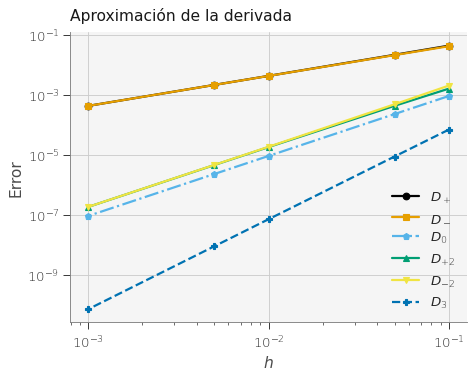

In [10]:
#Gráfica
plt.plot(h, ef, 'o-', label='$D_+$')
plt.plot(h, eb, 's-', label='$D_-$')
plt.plot(h, ec, 'p-.', label='$D_0$')
plt.plot(h, ef2, '^-', label='$D_{+2}$')
plt.plot(h, eb2, 'v-', label='$D_{-2}$')
plt.plot(h, e3, 'P--', label='$D_3$')

plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()